Образовательный центр МГТУ им. Н.Э. Баумана

# Выпускная квалификационная работа по курсу "Data Science"

## Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов).


Выполнил: Четвериков А.В.

Краткий план работы:

1. Загрузка данных и первичное исследование данных
	- загрузка данных;
	- объединение данных из нескольких датасетов;
	- число входных и выходных переменных;
	- объем выборки;
	- наличие пропусков, их обработка;
	- наличие дубдикатов, их обработка;
    
	
2. Разведочный анализ данных
	- выявление корелляции между переменными датасета
    - гистограммы распределения каждой переменной;
	- диаграммы ящика с усами;
	- попарные графики рассеяния точек;
	- для каждой переменной получить описательную статистику: среднее, медиана, стандартное отклонение, минимум, максимум, квартили;
	- рекомендации по выбору моделей машинного обучения для решения поставленной задачи;
    

3. Предобработка данных
	- удаление шумов;
	- нормализация;
	- стандартизация;
	- для каждой переменной получить описательную статистику: среднее, медиана, стандартное отклонение, минимум, максимум, квартили; в сравнении с параметрами до предобработки;
    

4. Разработка и обучение моделей прогнозирующих модуль упругости при растяжении и прочность при растяжении
	- понижение размерности набора признаков (Feature selection): статистические подходы, отбор с использованием моделей, перебор (Sequential Feature Selection);
	- разбивка данных на тестовую и обучающую выборки;
	- поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой (количество блоков равно 10);
	- линейная регрессия (на основе существующего набора признаков; добавлением комбинаций признаков(произведение, квадрат, функция);
	- метод деревья решений, визуализация дерева решений, определение основныз признаков датасета
	- метод случайного леса
	- нейронная сеть;
	- повышение точности при помощи бустинга (ансамблей методов);
    

5. Оценка точности моделей для прогнозирования свойств

6. Разработка и обучение модели, рекомендующей соотношение матрица-наполнитель
	- разбивка данных на тестовую и обучающую выборки;
	- линейная регрессия (на основе существующего набора признаков; добавлением комбинаций признаков(произведение, квадрат, функция);
	- нейронная сеть;
    

7. Оценка точности моделей для рекомендации состава

8. Разработка приложения с графическим интерфейсом, которое будет выдавать прогноз свойств и рекомендацию состава


In [1]:
# Загрузим необходимые библиотеки и модули 

import pathlib               #для задания относительного пути к файлам
from pathlib import Path


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import sklearn
import scipy

from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib inline



## 1. Загрузка данных и первичное исследование данных



In [3]:
# Определим путь к датасетам

dir_path = pathlib.Path.cwd()


paht_bp = Path(dir_path.parents[0], 'datasets', 'X_bp.xlsx')
paht_nup = Path(dir_path.parents[0], 'datasets', 'X_nup.xlsx')

# так же можно задать путь явно:   
# paht_bp = r"C:\ ... \vkr\datasets\X_bp.xlsx"
# paht_nup = r"C:\ ... \vkr\datasets\X_nup.xlsx"

In [4]:
#Загрузим первый датасет
df_bp = pd.read_excel(paht_bp)
df_bp.shape

(1023, 11)

In [5]:
#Отобразим первые 5 строк первого датасета 
df_bp.head()

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0         0.0                         1.857143            2030.0   
1         1.0                         1.857143            2030.0   
2         2.0                         1.857143            2030.0   
3         3.0                         1.857143            2030.0   
4         4.0                         2.771331            2030.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.736842                       129.00   
4             753.000000                       111.86   

   Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                        22.267857                100.000000   
1                        23.750000                284.615385   
2                        33.000000                284.615385   
3                        21.250000                300.000000   
4                        22.267857                284.615385   

   Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                          210.0                                  70.0   
1                          210.0                                  70.0   
2                          210.0                                  70.0   
3                          210.0                                  70.0   
4                          210.0                                  70.0   

   Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                         3000.0                    220.0  
1                         3000.0                    220.0  
2                         3000.0                    220.0  
3                         3000.0                    220.0  
4                         3000.0                    220.0

In [6]:
#Удалим первый столбец, так как он не несет никакой информации
df_bp.drop(['Unnamed: 0'], axis=1, inplace=True)
df_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [7]:
df_bp.shape

(1023, 10)

In [8]:
# Загрузим второй датасет 
df_nup = pd.read_excel(paht_nup)
df_nup.shape

(1040, 4)

In [9]:
#Посмотрим на первые 5 строк второго датасета 
df_nup.head()

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0         0.0                 0.0          4.0               57.0
1         1.0                 0.0          4.0               60.0
2         2.0                 0.0          4.0               70.0
3         3.0                 0.0          5.0               47.0
4         4.0                 0.0          5.0               57.0

In [10]:
#Удалим первый столбец, так как он не несет никакой информации
df_nup.drop(['Unnamed: 0'], axis=1, inplace=True)
df_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                 0.0          4.0               57.0
1                 0.0          4.0               60.0
2                 0.0          4.0               70.0
3                 0.0          5.0               47.0
4                 0.0          5.0               57.0

In [11]:
df_nup.shape

(1040, 3)

In [12]:
# Объединяем два датасета в один по типу INNER. 
df = pd.merge(df_bp, df_nup, left_index = True, right_index = True, how = 'inner')
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               57.0  
1                    220.0                 0.0          4.0               60.0  
2                    220.0                 0.0          4.0               70.0  
3                    220.0                 0.0          5.0               47.0  
4                    220.0                 0.0          5.0               57.0

In [13]:
df.shape

(1023, 13)

In [14]:
#Просмотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

In [15]:
# Все переменные содержат значения float64, качественные характеристики отсутствуют. Пропусков не имеется. 
# Ни одна из записей не является NaN, очистка не требуется. Объединенный файл имеет всего 1023 строки.


In [16]:
#Посмотрим уникальные значения в датасете
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [17]:
#В основном в каждом столбце содержатся только уникальные значения, но в столбце "Угол нашивки" всего 2 значения.

In [18]:
# Сохраним полученный датасет для дальнейшей работы
paht_out = Path(dir_path.parents[0], 'datasets', 'out.xlsx')

df.to_excel(paht_out)

In [19]:
#Изучим описательную статистику
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [20]:
# Проверим есть ли пропущенные данные
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<AxesSubplot:>

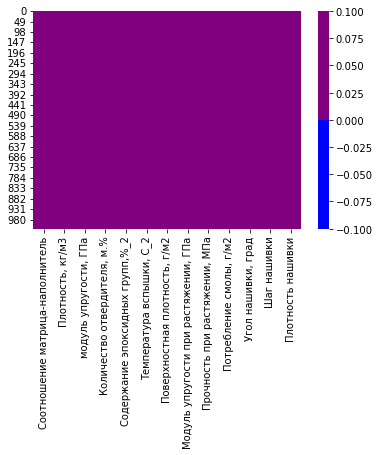

In [21]:
#Построим тепловую карту пропущенных данных
cols = df.columns
colours = ["blue", "purple"] 
sns.set_palette(colours)
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette())

In [22]:
# Проверим датасет на дубликаты
df.duplicated().sum()

0

In [23]:
#Посмотрим еще раз медианное и среднее значение
df.describe().loc[['mean', '50%']].T


mean          50%
Соотношение матрица-наполнитель          2.930366     2.906878
Плотность, кг/м3                      1975.734888  1977.621657
модуль упругости, ГПа                  739.923233   739.664328
Количество отвердителя, м.%            110.570769   110.564840
Содержание эпоксидных групп,%_2         22.244390    22.230744
Температура вспышки, С_2               285.882151   285.896812
Поверхностная плотность, г/м2          482.731833   451.864365
Модуль упругости при растяжении, ГПа    73.328571    73.268805
Прочность при растяжении, МПа         2466.922843  2459.524526
Потребление смолы, г/м2                218.423144   219.198882
Угол нашивки, град                      44.252199     0.000000
Шаг нашивки                              6.899222     6.916144
Плотность нашивки                       57.153929    57.341920

In [24]:
# медианное и среднее значение каждой переменной довольно близки друг к другу, кроме угла нашивки



## 2. Разведочный анализ данных



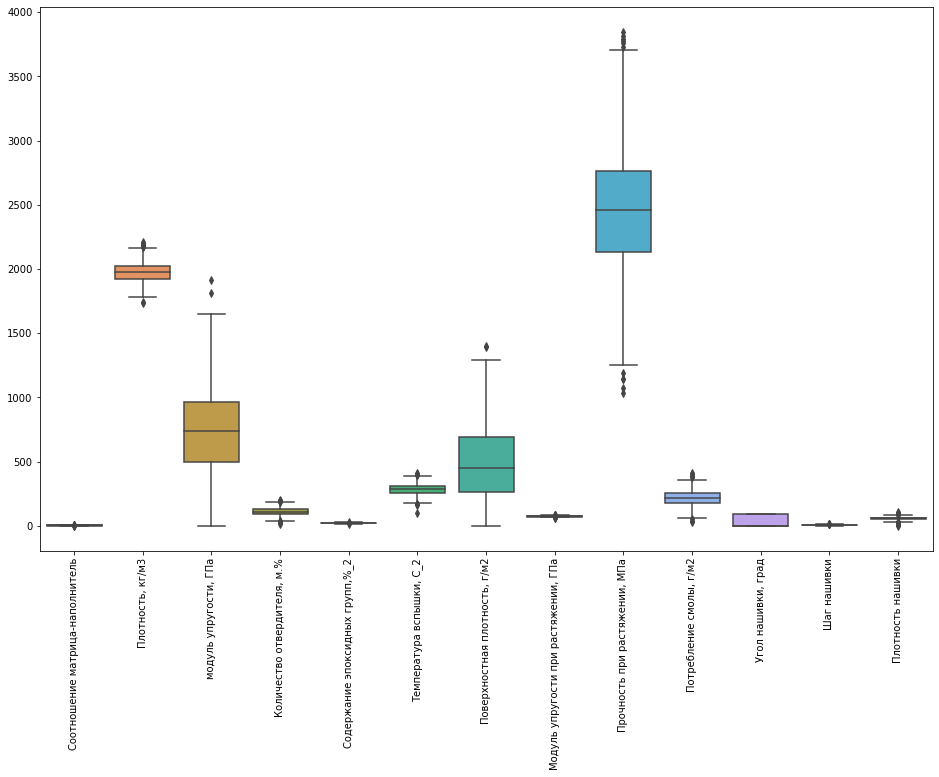

In [25]:
plt.figure(figsize = (16,10))
ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

In [26]:
# Вычислим коэффициенты корреляции.
df.corr().style.background_gradient(cmap='YlOrBr')

In [27]:
# Явной зависимости между переменными не наблюдается

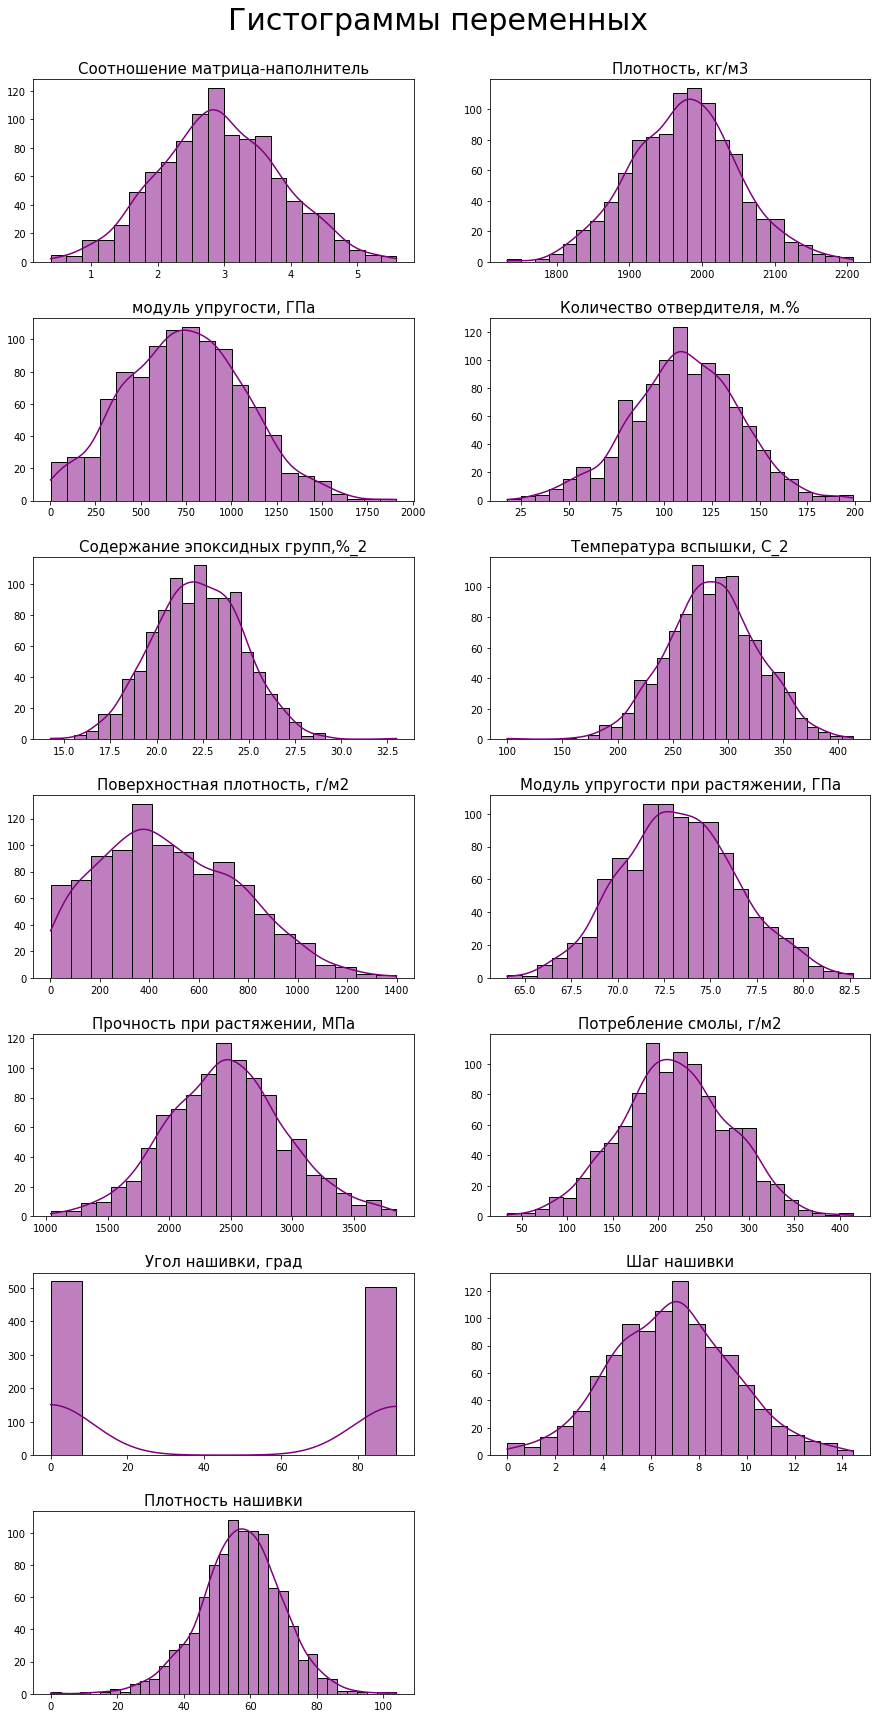

In [28]:
# Построим гистограммы распределения каждого признака
vertic = 7   # количество графиков по вертикали
horiz  = 2   # количество графиков по горизонтали
count  = 1   # порядковый номер графика
fig = plt.figure(figsize = (15,30))
fig.suptitle('Гистограммы переменных', y = 0.91 ,
             fontsize = 30)
for column in df.columns:
    ax = plt.subplot(vertic, horiz, count, box_aspect= 0.48)
    res = sns.histplot(data = df[column], kde=True, color = "purple")
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(column, y = 1.0, size = 15)
    count += 1

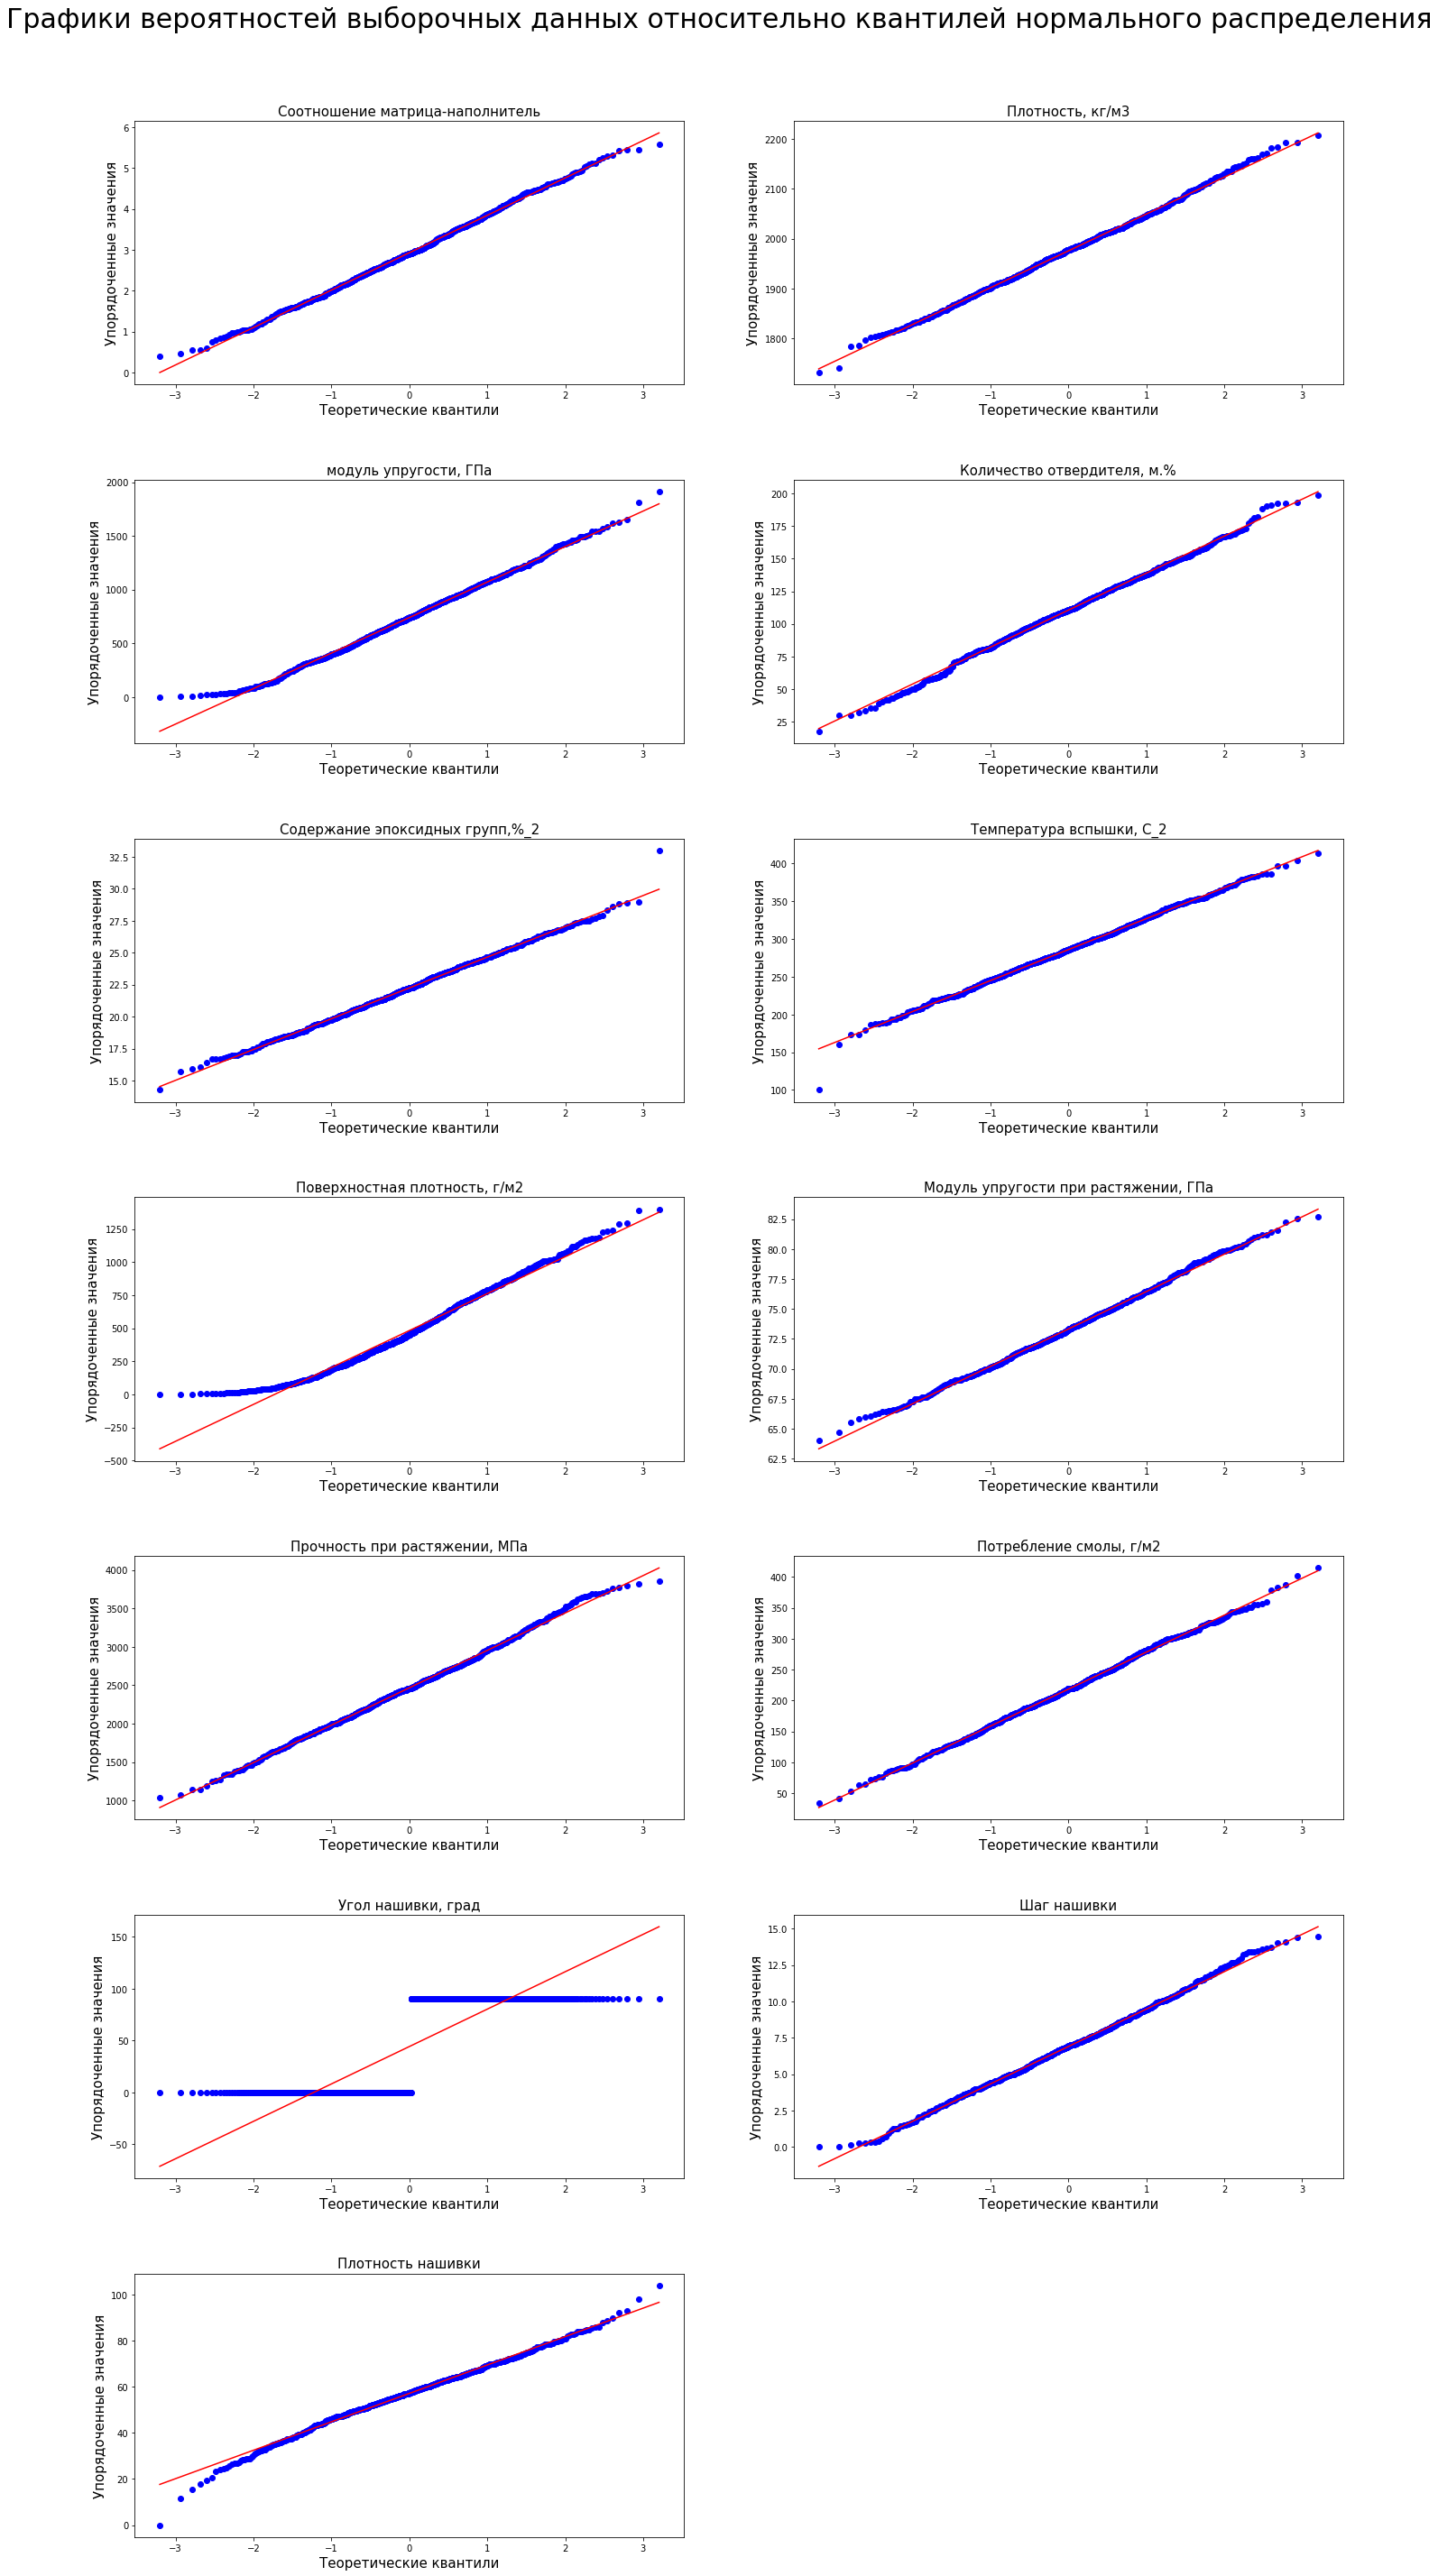

In [29]:
# график qq
vertic = 7   # количество графиков по вертикали
horiz  = 2   # количество графиков по горизонтали
count  = 1   # порядковый номер графика

fig = plt.figure(figsize = (24,50))
fig.suptitle('Графики вероятностей выборочных данных относительно квантилей нормального распределения', y = 0.91 ,
             fontsize = 30)
for column in df.columns:
    
    ax = plt.subplot(vertic, horiz, count, box_aspect= 0.48)
    res = scipy.stats.probplot(df[column], plot = plt)
    
    ax.set_xlabel("Теоретические квантили", fontsize = 15)
    ax.set_ylabel("Упорядоченные значения", fontsize = 15)
    ax.set_title(column, y = 1.0, size = 15)
    
    count += 1

In [30]:
# Данные стремятся к нормальному распределению практически везде, 
# кроме угла нашивки, имеющим только 2 значения, с которым мы уже поработали ранее. 

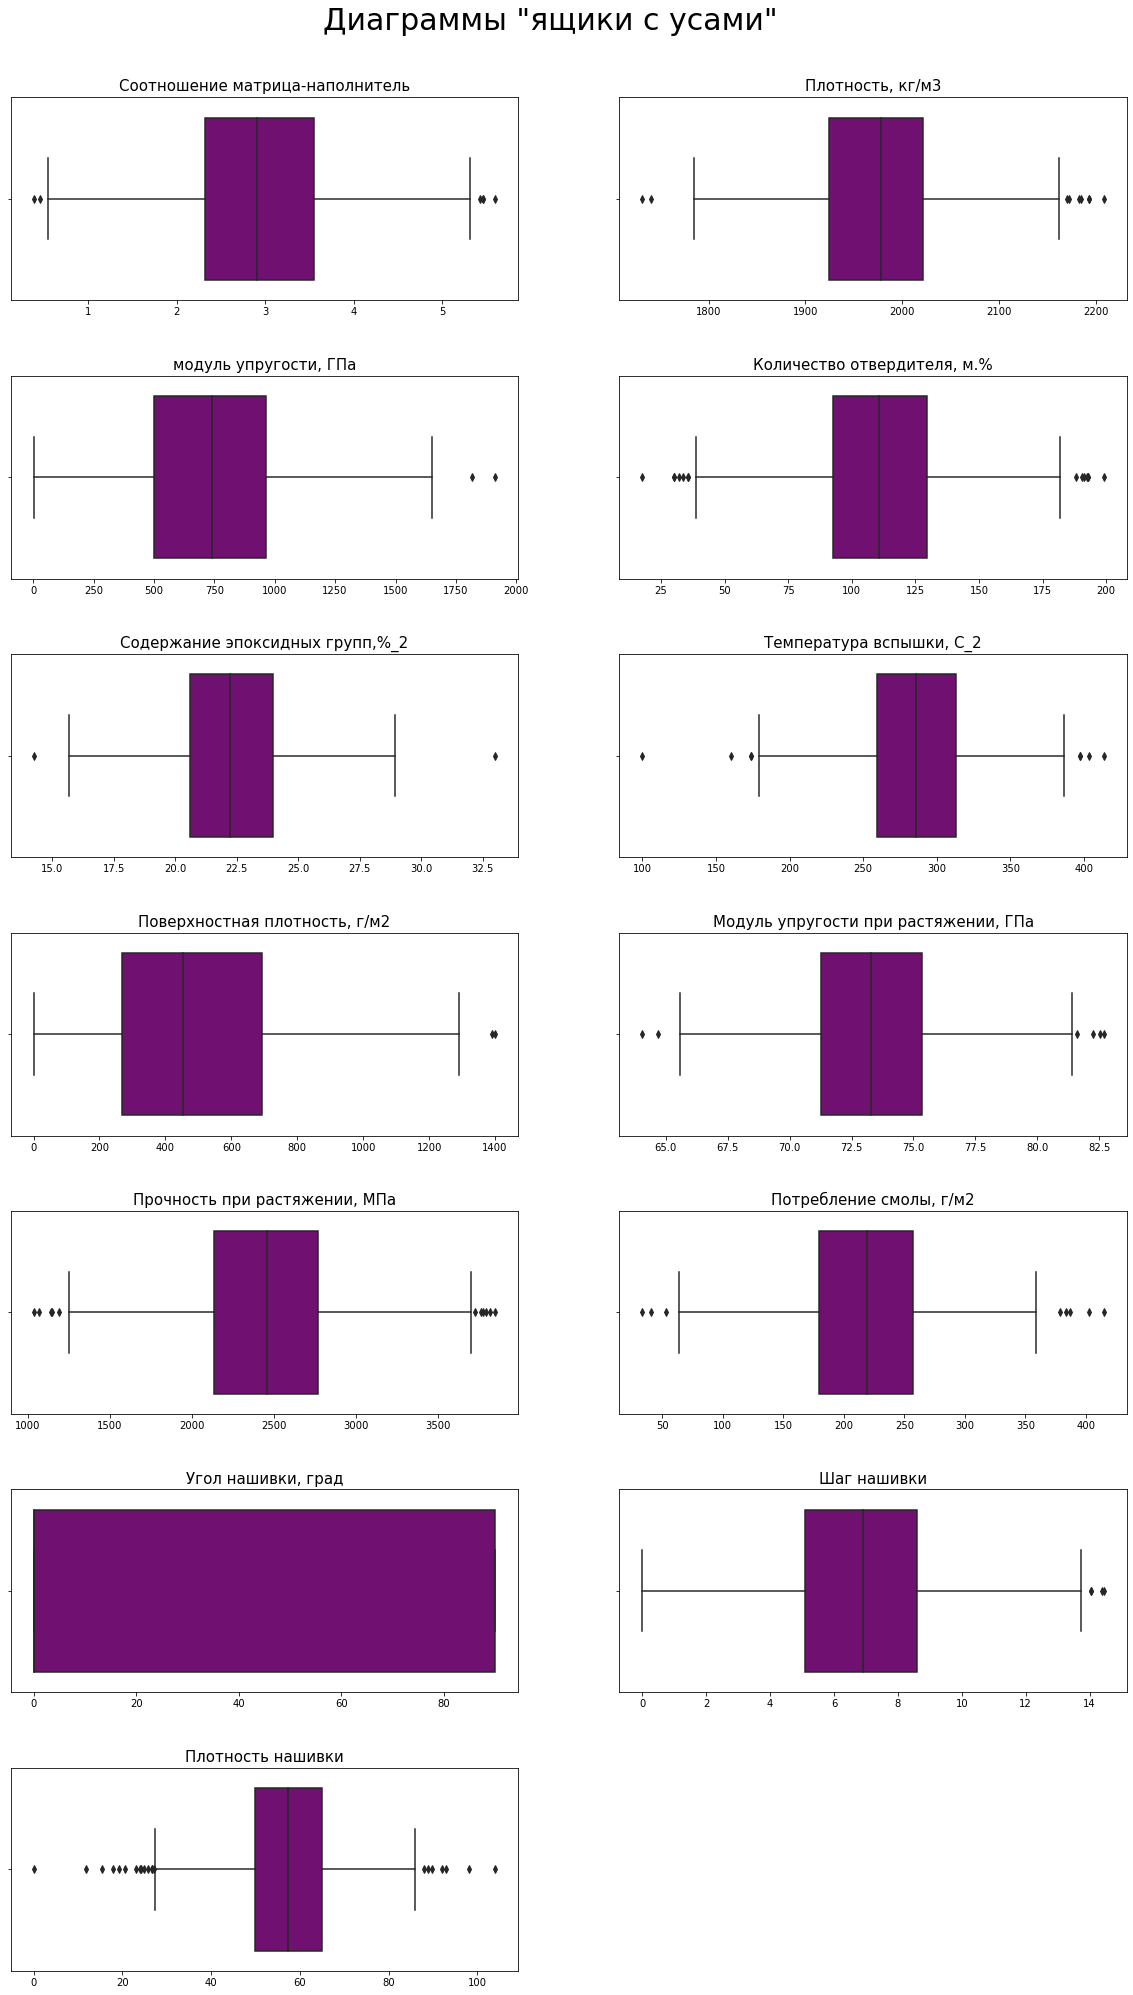

In [31]:
# Построим ящики с усами для каждого признака отдельно
vertic = 7   # количество графиков по вертикали
horiz  = 2   # количество графиков по горизонтали
count  = 1   # порядковый номер графика

fig = plt.figure(figsize = (20,35))
fig.suptitle('Диаграммы "ящики с усами"', y = 0.91 ,
             fontsize = 30)
for column in df.columns:

    
    ax = plt.subplot(vertic, horiz, count, box_aspect= 0.40)
    res = sns.boxplot(x = df[column], color = "purple");
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(column, y = 1.0, size = 15)
    
    
    
    count += 1

In [32]:

# "Ящики с усами" показывают наличие выбросов во всех столбцах, кроме углов нашивки


<function matplotlib.pyplot.show(close=None, block=None)>

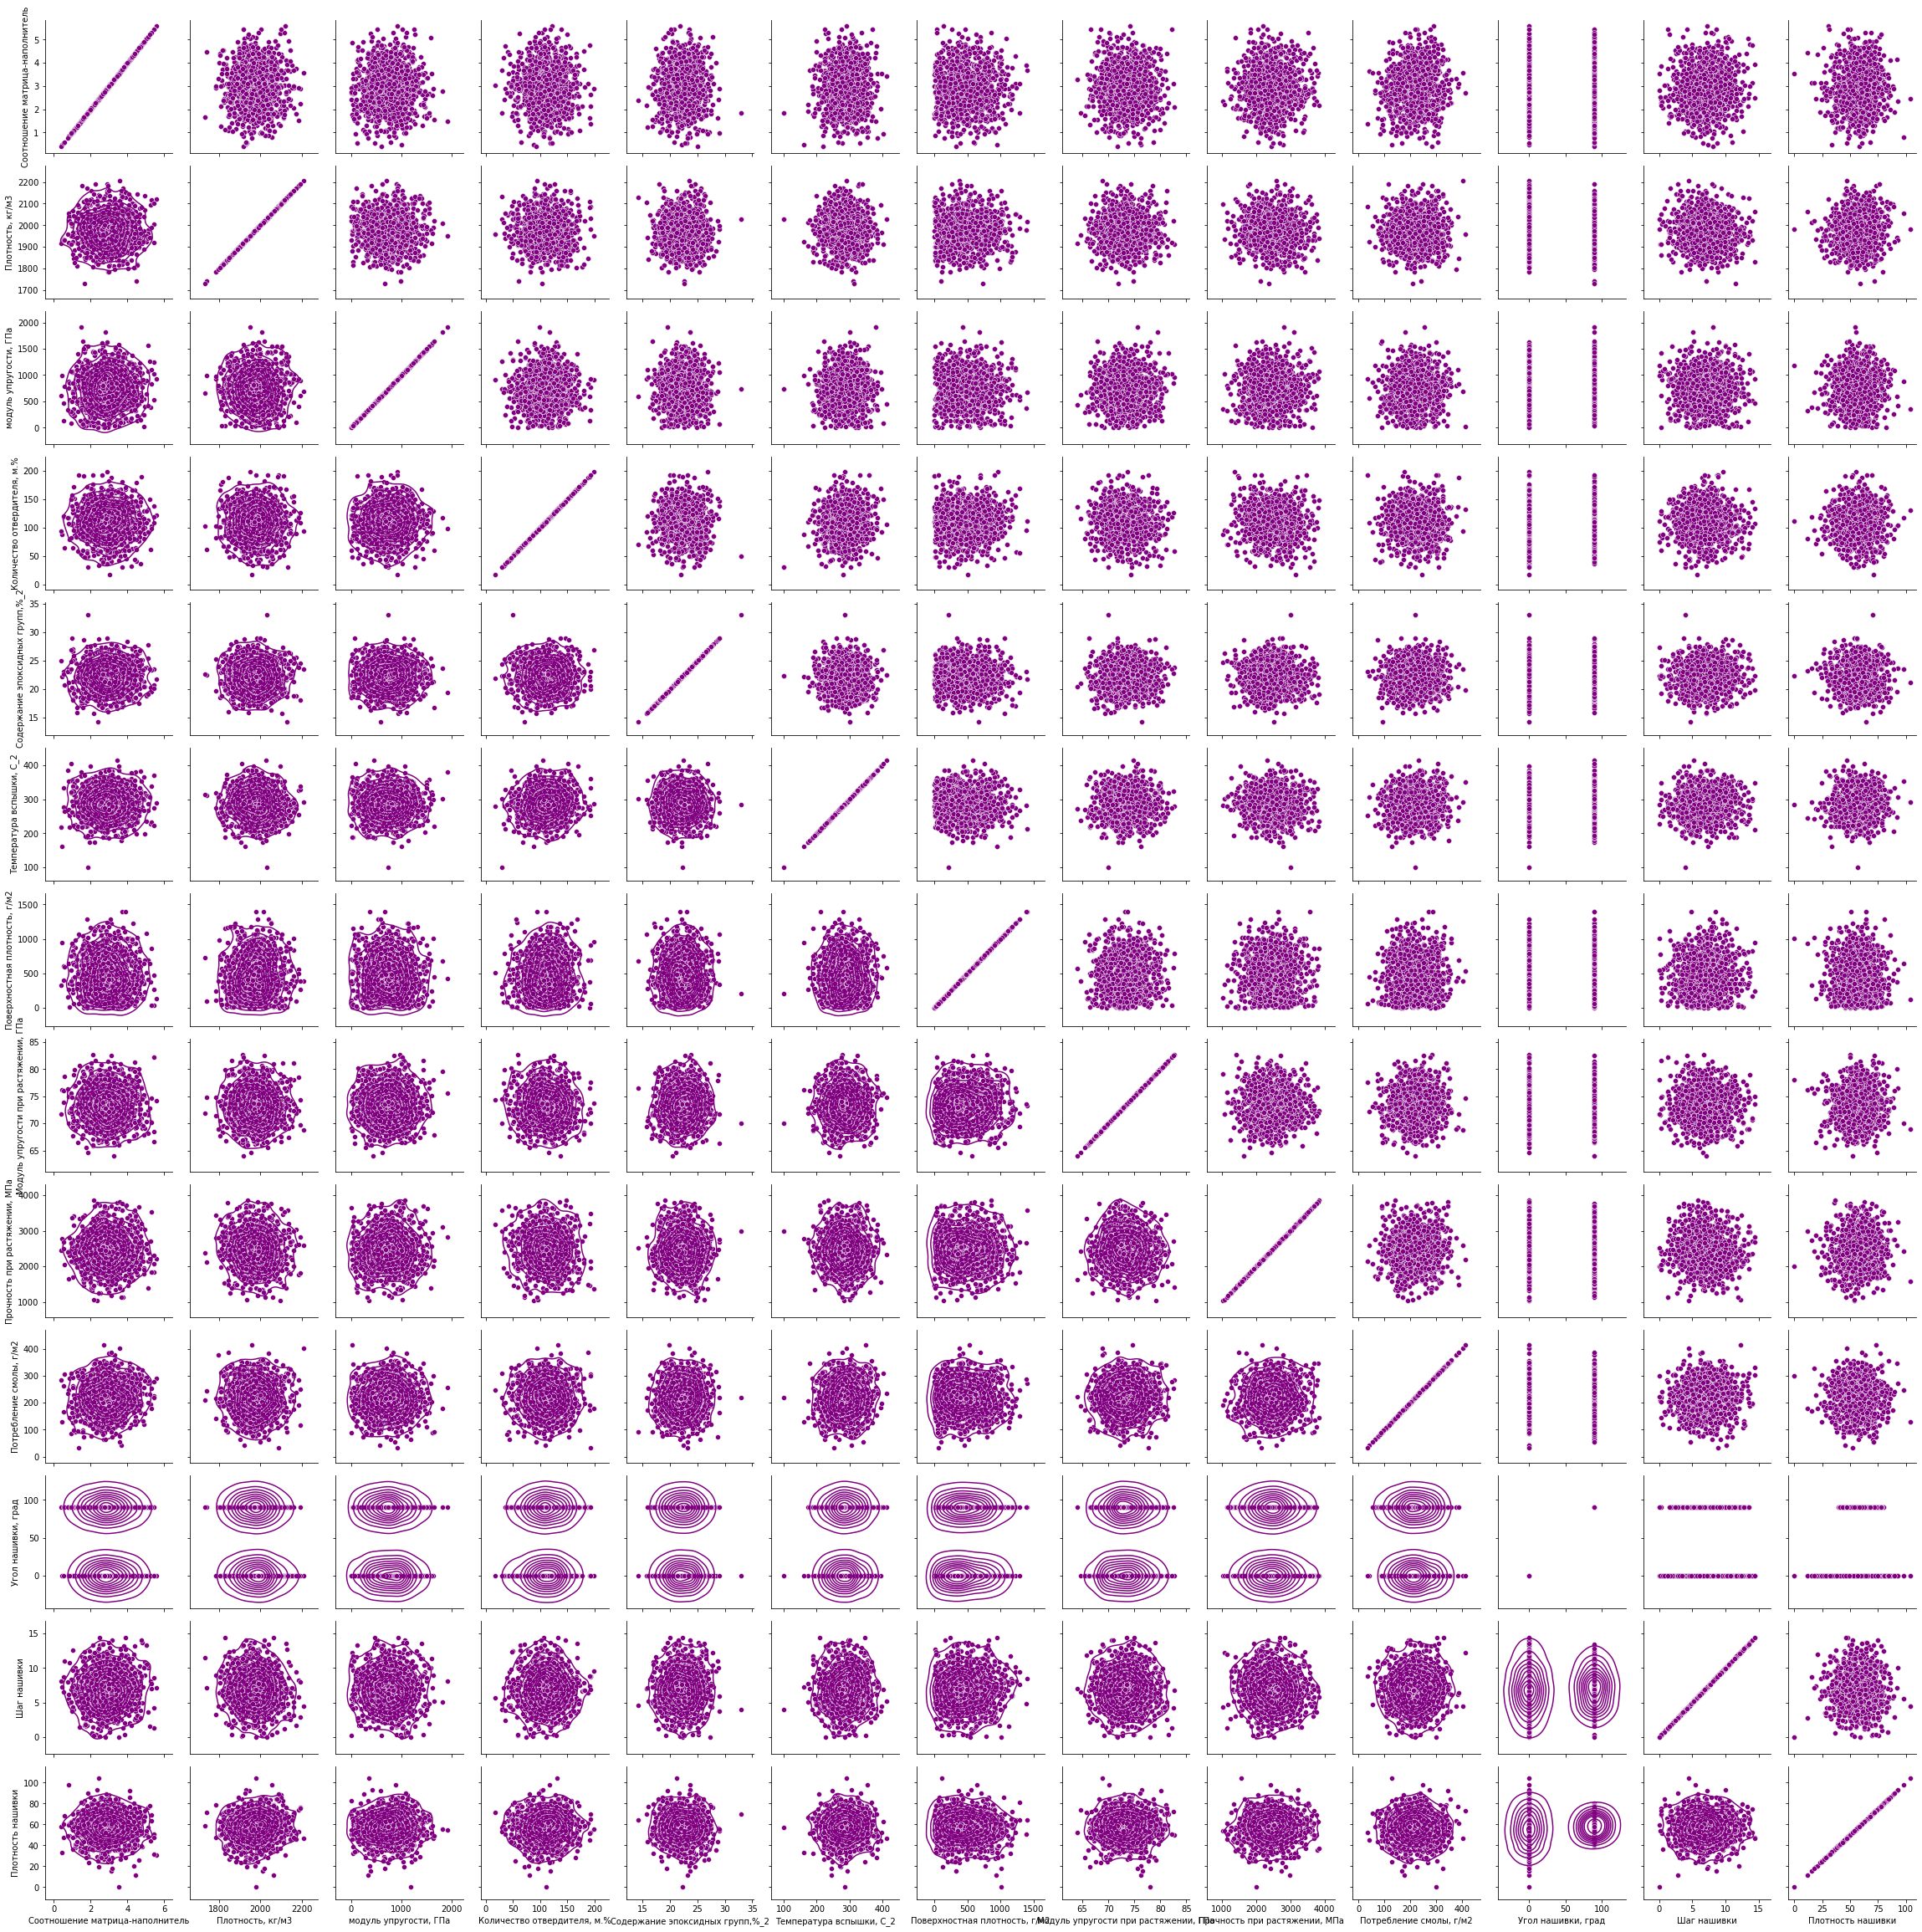

In [33]:
# Построим попарные графики рассеяния
g = sns.PairGrid(df[df.columns])
g.map(sns.scatterplot, color = 'purple')
g.map_upper(sns.scatterplot, color = 'purple')
g.map_lower(sns.kdeplot, color = 'purple')
plt.show

In [34]:

# Попарные графики рассеяния точек так же не показывают какой-либо зависимости между данными. 
# Зависимость между показателями не линейная, явная взаимосвязь отсутствует, необходимо использовать несколько показателей.
# На графиках можно наблюдать выбросы, потому что некоторые точки располагаются далеко от общего облака



Вывод: <br>
на данном этапе работы на сырых данных мы наблюдаем выбросы в каждом столбце, кроме столбца "Угол нашивки" и корреляция входных переменных очень слабая.